# Лабораторная работа № 2 по предмету "Методы оптимизации"
<p style='text-align: right'> Выполнил Горелик Александр, МП-301 </p>

**Цель работы(вариант 16)**: Найти точку минимума целевой функции $f (x) = e^{x^2 + x} + e^{x^2 + 1}$ на отрезке $[-1, 1]$ с точностью  $\epsilon = 0.01$ с помощью метода золотого сечения и метода Фибоначчи.

Для визуализации лабораторной работы начертим график данной функции на отрезке.

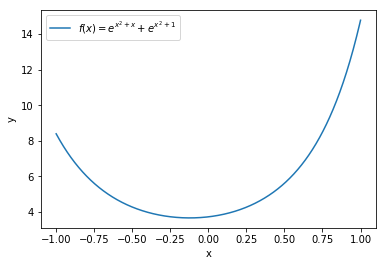

In [12]:
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return np.exp(x * x + x) + np.exp(x * x + 1)

x = np.linspace(-1, 1, 1000)
y = f(x)
plt.plot(x, y, label='$f (x) = e^{x^2 + x} + e^{x^2 + 1}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

П. 1. Найдем минимум методом золотого сечения. Затем воспользуемся функцией *scipy.optimize.minimize_scalar* для проверки полученного результата и продемонстрируем на графике.

Result of dychotomy method:  -0.12387866006224985
Result of library minimize function:  -0.12275070459589121
Absolute error 0.0011279554663586322
Relative error 0.009188993823473237


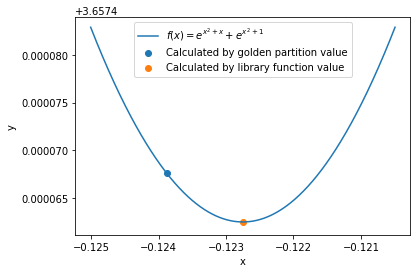

In [13]:
epsilon = 1e-2
tau = (np.sqrt(5) - 1) / 2
a = -1
b = 1
ak = a
bk = b
k = 1
xk = ak + (1 - tau) * (bk - ak)
yk = ak + tau * (bk - ak)
f_xk = f(xk)
f_yk = f(yk)
while (bk - ak > epsilon):
    k += 1
    if f(xk) >= f(yk):
        ak = xk
        xk = yk
        f_xk = f_yk
        yk = ak + tau * (bk - ak)
        f_yk = f(yk)
    else:
        bk = yk
        yk = xk
        f_yk = f_xk
        xk = ak + (1 - tau) * (bk - ak)
        f_xk = f(xk)
    #print(ak, bk)
x_min = (ak + bk)/2
print('Result of dychotomy method: ', x_min)
x_min_lib = spo.minimize_scalar(f).x
print('Result of library minimize function: ', x_min_lib)
abs_error = np.abs(x_min - x_min_lib)
print('Absolute error', abs_error)
print('Relative error', np.abs(abs_error / x_min_lib))

local_x = np.linspace(x_min_lib - 2 * abs_error, x_min_lib + 2 * abs_error, 1000)
local_y = f(local_x)
plt.plot(local_x, local_y, label='$f (x) = e^{x^2 + x} + e^{x^2 + 1}$')
plt.scatter(x_min, f(x_min), label='Calculated by golden partition value')
plt.scatter(x_min_lib, f(x_min_lib), label='Calculated by library function value')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

 П. 2. Воспользуемся методом Фибоначчи.

Result of partition method:  -0.12341998269527174
Result of library minimize function:  -0.12275070459589121
Absolute error 0.000669278099380527
Relative error 0.0054523361115022834


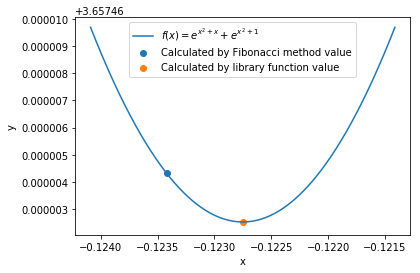

In [16]:
epsilon = 1e-2
alpha = 1e-3
a = -1
b = 1
ak = a
bk = b
k = 1
fib = [0, 1]
while (epsilon * fib[-1] <= b - a):
    fib.append(fib[-1]+fib[-2])
xk = ak + fib[-k - 2] * (bk - ak) / fib[-k]
yk = ak + fib[-k - 1] * (bk - ak) / fib[-k]
f_xk = f(xk)
f_yk = f(yk)
for i in np.arange(len(fib)):
    if f(xk) > f(yk): 
        ak = xk
        xk = yk
        f_xk = f_yk
        yk = ak + fib[-k - 1] * (bk - ak) / fib[-k]
        f_yk = f(yk)
    else:
        bk = yk
        yk = xk
        f_yk = f_xk
        xk = ak + fib[-k - 2] * (bk - ak) / fib[-k]
        f_xk = f(xk)
x_min = (ak + bk) / 2
print('Result of partition method: ', x_min)
x_min_lib = spo.minimize_scalar(f).x
print('Result of library minimize function: ', x_min_lib)
abs_error = np.abs(x_min - x_min_lib)
print('Absolute error', abs_error)
print('Relative error', np.abs(abs_error / x_min_lib))

local_x = np.linspace(x_min_lib - 2 * abs_error, x_min_lib + 2 * abs_error, 1000)
local_y = f(local_x)
plt.plot(local_x, local_y, label='$f (x) = e^{x^2 + x} + e^{x^2 + 1}$')
plt.scatter(x_min, f(x_min), label='Calculated by Fibonacci method value')
plt.scatter(x_min_lib, f(x_min_lib), label='Calculated by library function value')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Таким образом, с помощью обоих методов мы получили результаты с достаточно низкой абсолютной и относительной погрешностью.